# Multiplicated Seasonal ARIMA 모형

단순 Seasonal ARIMA 모형은 다음과 같은 수식으로 표현되면 시간 지연이 모두 $s$의 정수배이다.

$$ \phi(L^s)\nabla_s^D Y_t = \theta(L^s)e_t $$

시간 지연이 모두 $s$의 정수배이기 때문에 원 시계열 자료는 $s$개의 분리된 시계열 자료와 마찬가지이다. 자기상관계수 함수도 시차가 $s$의 정수배인 경우만 0이 아니고 나머지 경우에는 모두 0이다.

그러나 실제 계절성을 보이는 자료에 대해 자기상관계수 함수를 구하면 시차가 s의 정수배인 경우에 큰 값을 보이지만 일반적으로 그 주변의 시차에서도 0이 아닌 유의한 값을 보인다. 이러한 특성을 모형화 하려면 $s$개의 시계열 자료가 완전히 독립적으로 움직이는 것 보다는 그 사이에도 영향을 미치는 일반적인 ARIMA 모형의 특성도 가지고 있어야 한다.

일반적인 ARIMA 모형은 다음과 같은 수식을 따른다.

$$ \phi(L)\nabla^D Y_t = \theta(L)e_t $$

이 두 가지 특성을 동시에 가지고 있는 모형을 Multiplicated Seasonal ARIMA (p,d,q)x(P,D,Q,s) 모형이라고 하며 다음과 같은 수식을 따르게 된다. 

$$ \phi_p(L)\tilde{\phi}_P(L^s)\nabla_s^D\nabla^d Y_t = \theta_q(L)\tilde{\theta}_Q(L^s)e_t $$

## 예 1: Multiplicated SARIMA(0,0,1)x(0,0,1,12)

예를 들어 다음과 같은 모형은 Multiplicated SARIMA(0,0,1)x(0,0,1,12) 모형이다. 이 모형은 계절주기가 12 이고 12주기 자료간에 ARIMA(0,0,1) 모형 관계가 있고 일반 자료간에 ARIMA(0,0,1)의 관계가 있다. 

$$ Y_t = (1-\theta L)(1-\Theta L^{12}) e_t = e_t - \theta e_{t-1} - \Theta e_{t-12} + \theta\Theta e_{t-13} $$

이 모형의 자기상관계수 함수를 계산하면 시차가 1, 11, 12, 13 인 경우를 제외하고는 0이된다.

$$ \rho_1 = -\dfrac{\theta}{1+\theta^2} $$

$$ \rho_{11} = \rho_{13} = \dfrac{\theta\Theta}{(1+\theta^2)(1+\Theta^2)} $$

$$ \rho_{12} = -\dfrac{\Theta}{1+\Theta^2} $$

몇가지 $\theta,\Theta$값에 대해 이 모형의 자기상관계수 함수를 구하면 다음과 같다.

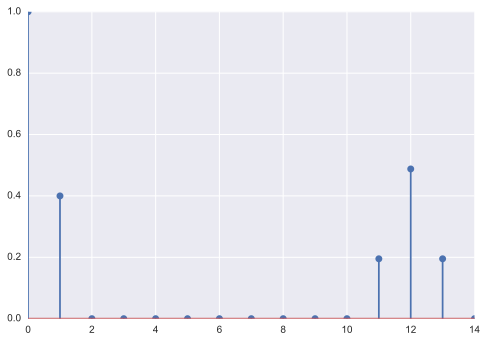

In [8]:
theta = -0.5
Theta = -0.8
p = sm.tsa.ArmaProcess([1], [1, -theta, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -Theta, theta * Theta])
plt.stem(p.acf(15));

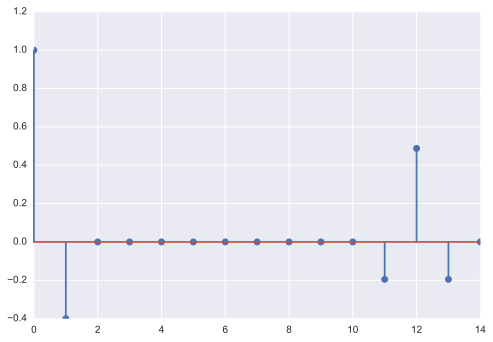

In [9]:
theta = 0.5
Theta = -0.8
p = sm.tsa.ArmaProcess([1], [1, -theta, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -Theta, theta * Theta])
plt.stem(p.acf(15));

## 예 2: Multiplicated SARIMA(0,0,1)x(1,0,0,12)

또 다른 예로 Multiplicated SARIMA(0,0,1)x(1,0,0,12) 모형을 살펴보자. 이 모형은 주기가 12 인 계절성 요소끼리는 ARMA(1,0) 모형이고 계별 요소끼리는 ARMA(0,1) 모형이다.

$$ (1-\Phi L^{12})Y_t = e_t - \theta e_{t-1} $$

$$ Y_t - \Phi Y_{t-12} = e_t - \theta e_{t-1} $$

$$ Y_t =  \Phi Y_{t-12} + e_t - \theta e_{t-1} $$

이 모형의 자기상관계수 함수를 계산하면 시차가 12의 배수와 그 앞, 뒤인 경우 즉, 시차가 $12k$, $12k+1$, $12k-1$ 형태로 표시되는 경우만 0이 아니고 나머지 값은 0이다.

$$ \rho_{12k} = \Phi^k $$

$$ \rho_{12k-1} = \rho_{12k+1} = -\dfrac{\theta}{1+\theta^2} \Phi^k $$

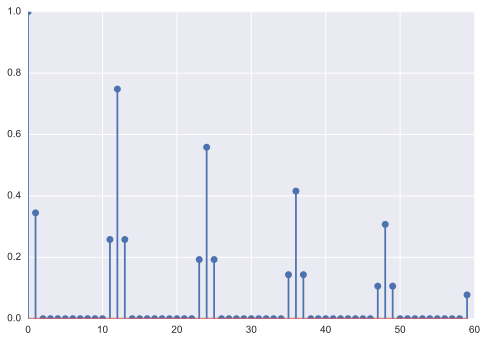

In [15]:
Phi = 0.75
Theta = -0.4
p = sm.tsa.ArmaProcess([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -Phi], [1, -Theta])
plt.stem(p.acf(60));

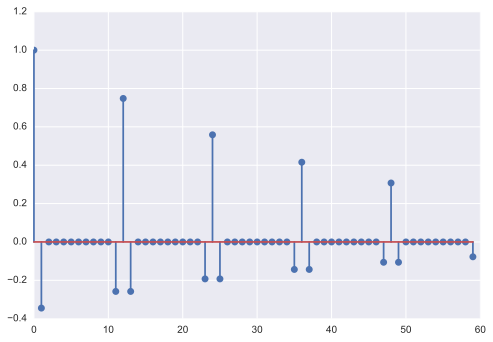

In [16]:
Phi = 0.75
Theta = 0.4
p = sm.tsa.ArmaProcess([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -Phi], [1, -Theta])
plt.stem(p.acf(60));

## 예 3: Multiplicated SARIMA(0,1,0)x(0,1,0,12)

이번에는 적분 요소가 있는 Multiplicated Seasonal ARIMA 모형을 살펴보자. 계절성 주기가 12 이고 계절성 성분끼리 1차 적분, 일반 성분 끼리 1차 적분인 모형은 SARIMA(0,1,0)x(0,1,0,12) 모형이다.

$$ \nabla_s \nabla Y_t = e_t $$

$$ \nabla_s ( Y_t - Y_{t-1} ) = e_t $$

$$ ( Y_{t} - Y_{t-1} ) - ( Y_{t-12} - Y_{t-13} ) = e_t $$

$$ Y_{t} =  Y_{t-1} +  Y_{t-12} - Y_{t-13} + e_t $$

이 모형은 시계열을 차분하여 만든 새로운 시계열을 다시 12 시간 간격으로 계절성 차분한 시계열이 백색 잡음이라는 의미이다.

## 예 4: Multiplicated SARIMA(0,1,1)x(0,1,1,12)

이번에는 계절성 주기가 12 이고 일반 성분과 계절성 성분이 모두 ARIMA(0,1,1)인 SARIMA(0,1,1)x(0,1,1,12) 모형이다.

$$ \nabla_s \nabla Y_t = (1 - \Theta L^{12})(1 - \theta L) e_t$$

$$ \nabla_s ( Y_t - Y_{t-1} ) =  e_t - \theta e_{t-1} - \Theta e_{t-12} + \theta\Theta e_{t-13}  $$

$$ ( Y_{t} - Y_{t-1} ) - ( Y_{t-12} - Y_{t-13} ) =  e_t - \theta e_{t-1} - \Theta e_{t-12} + \theta\Theta e_{t-13}   $$

$$ Y_{t} =  Y_{t-1} +  Y_{t-12} - Y_{t-13} +  e_t - \theta e_{t-1} - \Theta e_{t-12} + \theta\Theta e_{t-13}   $$

이 모형은 시계열을 차분하여 만든 새로운 시계열을 다시 12 시간 간격으로 계절성 차분한 시계열이 위에서 보인 첫번째 예인 SARIMA(0,1,1)x(0,0,1,12) 모형이라는 의미이다.